<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Evaluaciones/EvaluacionFinal_2023_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Examen Final:

Métodos Computacionales para físicos



Nota: La entrega del examen es a través del github en la página del curso, en el directorio asociado a cada uno.




Las aletas son sólidos que transfieren calor por conducción a lo largo de su geometría y por convección a través de su entorno. La ecuación diferencial que describe la temperatura como función de  la longitud de una  aleta viene dada por :


\begin{equation}
\frac{d^2(T-T_{\infty})}{dx^2} - \left( \frac{hp}{kAc} \right ) ^2 (T-T_{\infty})=0
\end{equation}

donde Ac es el  área de la sección transversal Ac, p es perímetro,
k es el coficiente de conducción que depende de cada material y h el coficiente de convección. La temperatura  $T_{\infty}$ es la temperatura ambiente.


![aleta](https://github.com/hernansalinas/autogradesMetodosComputacionales/blob/main/Evaluaciones/img/aleta.png?raw=true)



En general, el área de la sección transversal A y el perímetro p de una aleta
varían con x, lo cual hace que esta ecuación diferencial sea difícil de resolver. En el caso especial de una sección transversal constante y conductividad térmica constante, la ecuación diferencial se reduce a

\begin{equation}
\frac{d^2 \theta}{dx^2} - a ^2 \theta=0
\end{equation}


donde  $\theta=T-T_{\infty}$ y $a=\frac{hp}{kAc}$


Para una aleta suficientemente larga de sección transversal uniforme (Ac =
constante), la temperatura en la base de la aleta viene dada por:


\begin{equation}
\theta(0)=\theta_b=T_b-T_{\infty}
\end{equation}


 y en la punta de la aleta, tenderá a la del medio, por consiguiente $\theta$ tenderá a cero.

\begin{equation}
\theta(L)=T(L)-T_{\infty}=0
\end{equation}

La solucion  exacta viene dada por :

\begin{equation}
T(x)=T_{\infty}+(T_b-T_{\infty})e^{-x\sqrt{hp/kAc}}
\end{equation}



Considerando  una aleta rectangular muy larga, fijada a una
superficie plana de tal forma que la temperatura en el extremo
de la aleta es prácticamente la del aire circundante, es decir,
$T_{\infty}=300K$. Asuma que el ancho es de 5.0 cm, el espesor de 1 mm, es decir, su area $A=5\times 10^{-5}m^2$ y su perimetro de $p=0.102m$. La  conductividad térmica es $k=200 W/m K$, la temperatura en la base de $T_b=313K$ y el coeficiente de transferencia de calor es de $h=20 W/m^2K$. Calcule:



1 (30%) La solución numérica de la ecuación diferencial.

2 (20%) Construya un gráfico de  la temperatura de la aleta como función de la longitud de la aleta

3 (25%) Compare la solución numérica con la analítica

4 (25%) Empleando el método de newton detetermine el punto de la aleta para la cual la temperatura es de 305K





Referencias: Ejercicio e imagenes tomado y adaptado de:

Cengel, Y. A. (2016). “Transferencia de calor y masa” McGRAW-HILL/INTERAMERICANA EDITORES, S.A. DE C.V. 3ra. Edición



\begin{equation}
\frac{d^2 \theta}{dx^2} - a ^2 \theta=0
\end{equation}
\begin{equation}
\frac{d \theta}{dx} = \omega
\end{equation}

\begin{equation}
\frac{d \omega}{dx} = a^2 \theta
\end{equation}

por lo que los valores iniciales $\theta_0, \omega_0$, son 13 y 0 respectivamente $\theta_i = (\theta_0, \omega_0) = (13, 10^{-12})$


#Ecuación diferencial de primer orden

\begin{equation}
\frac{d \theta}{d x} = f(x, \theta)
\end{equation}

\begin{equation}
\frac{\theta(x+\Delta x) - \theta(t)}{\Delta x} = f(x, \theta)
\end{equation}

\begin{equation}
\theta(x+\Delta x)= \theta(x) +\Delta x f(x, \theta)
\end{equation}


\begin{equation}
\theta_{i+1}= \theta_i +\Delta x f(x, \theta_i)
\end{equation}


In [13]:
import numpy as np
import scipy as sc
import sympy as sp
import matplotlib.pyplot as plt


In [58]:
#Parametros iniciales
T8 = 300      #en grados kelvin
Tb = 313      #temperatura base en grados kelvin
L = 0.05      #Ancho o Longitud en m
esp = 0.001    #esperos en m
p = 0.102     #perímetro en m
k = 200       #conductividad en W/mK
h = 20        #coeficiente de transferencia de calor en W/(m²K)
Ac = L*esp     #Area en m^2

params = (T8,Tb,Ac,p,k,h)
theta_0 = 13
omega_0 = -13*np.sqrt((h*p)/(k*Ac))

In [45]:
def funcion (x, theta_0, omega_0,params):
  cond_ini = np.array([theta_0,omega_0])
  h = x[1]-x[0]
  N = len(x)
  theta = np.zeros(N)
  omega = np.zeros(N)
  theta[0] = cond_ini[0]
  omega[0] = cond_ini[1]
  for i in range(0, N-1):
    euler_so = funcion_euler_segundo_orden(x[i], cond_ini, params)
    theta[i+1] = theta[i] + h*euler_so[0]
    omega[i+1] = omega[i] + h*euler_so[1]
    cond_ini = np.array([theta[i+1],omega[i+1]])
  return theta, omega

def funcion_euler_segundo_orden(x,cond_ini,params):
    T8 = params[0]
    Tb = params[1]
    Ac = params[2]
    p = params[3]
    k = params[4]
    h = params[5]
    dthetadt = cond_ini[1]
    domegadt = (((h*p)/(k*Ac))**2)*cond_ini[0]
    return dthetadt, domegadt



In [54]:
def Temperatura(x,params):
  T8 = params[0]
  Tb = params[1]
  Ac = params[2]
  p = params[3]
  k = params[4]
  h = params[5]
  T = T8 + (Tb-T8)*np.exp(-1*x*np.sqrt((h*p)/(k*Ac)))
  return T

In [59]:
x = np.linspace(0,L,100)
T = Temperatura(x,params)
theta_, omega_ = funcion(x, theta_0, omega_0,params)
T_= theta_+T8


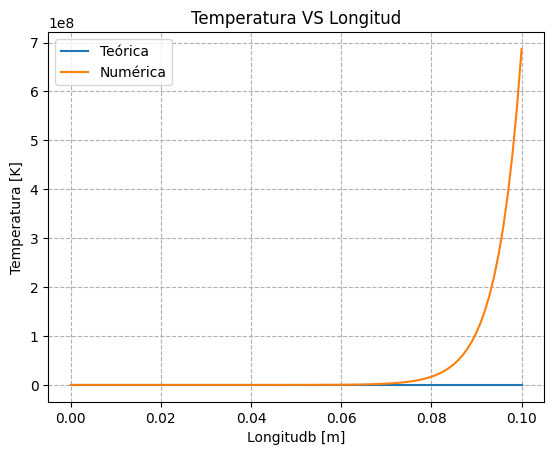

In [57]:

plt.plot(x,T, label="Teórica")
plt.plot(x,T_, label = "Numérica")
plt.xlabel("Longitudb [m]")
plt.ylabel("Temperatura [K]")
plt.title("Temperatura VS Longitud")
plt.grid(linestyle = "--")
plt.legend()

Empleando el método de newton detetermine el punto de la aleta para la cual la temperatura es de 305K

In [61]:
from scipy import optimize as op

def Temperatura2(x,params):
  T8 = params[0]
  Tb = params[1]
  Ac = params[2]
  p = params[3]
  k = params[4]
  h = params[5]
  T = T8 + (Tb-T8)*np.exp(-1*x*np.sqrt((h*p)/(k*Ac)))-305
  return T

opx = op.newton(Temperatura2,Tb,args=params tol = E-12)
print(opx)

SyntaxError: ignored